In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 110.45573088235464
Iteration 2, RMSE: 113.95404669069102
Iteration 3, RMSE: 68.11015957387099
Iteration 4, RMSE: 86.10719654376868
Iteration 5, RMSE: 84.47730527588696
Iteration 6, RMSE: 66.48515918440404
Iteration 7, RMSE: 250.9898621920523
Iteration 8, RMSE: 296.06680320747336
Iteration 9, RMSE: 159.91310416375748
Iteration 10, RMSE: 247.43745983027998
Iteration 11, RMSE: 327.8698759052444
Iteration 12, RMSE: 244.06610605821723
Iteration 13, RMSE: 272.47298552399894
Iteration 14, RMSE: 274.9952811505194
Iteration 15, RMSE: 233.9865774462912
Iteration 16, RMSE: 233.81795591471445
Iteration 17, RMSE: 253.92918115079246
Iteration 18, RMSE: 167.09448989165136
Iteration 19, RMSE: 165.02019147951302
Iteration 20, RMSE: 163.8077016344917
Iteration 21, RMSE: 151.02630568455868
Iteration 22, RMSE: 203.50665541641624
Iteration 23, RMSE: 199.99243703620053
Iteration 24, RMSE: 146.7549494391609
Iteration 25, RMSE: 144.41769650233655
Iteration 26, RMSE: 180.10237695240954
Itera

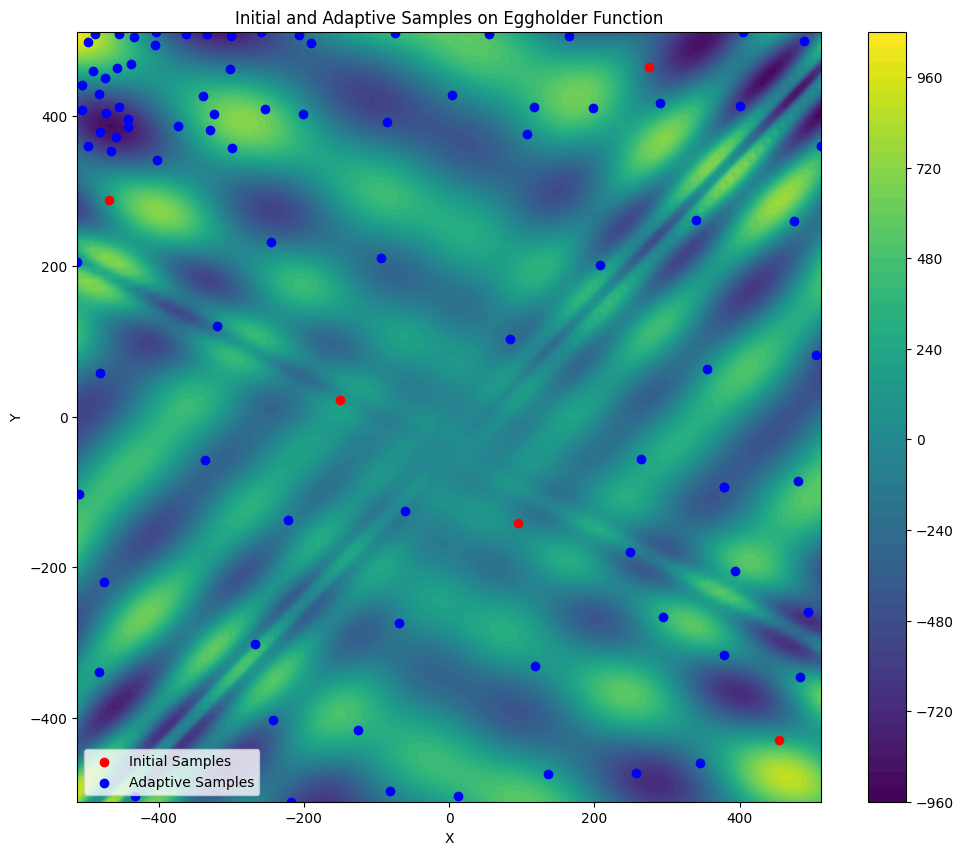

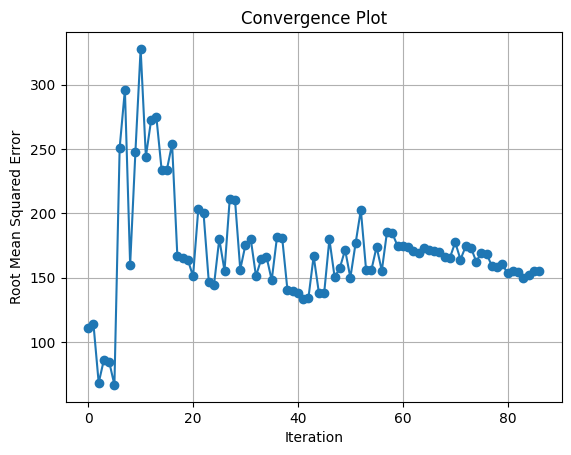

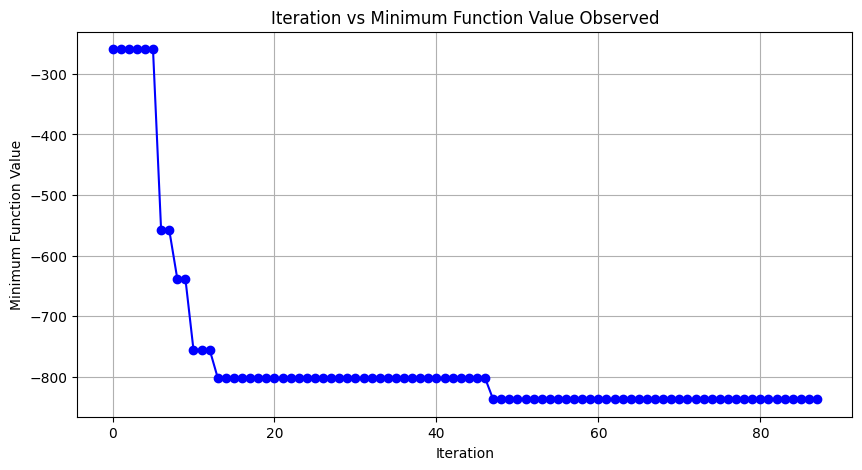

Best observed function value after active learning: -837.2827052351447
             X           Y
0    94.766809 -141.256431
1   274.793633  465.418375
2  -150.432186   22.281023
3   454.611332 -429.982796
4  -468.103871  288.528576
..         ...         ...
88  483.023120 -345.803309
89  116.184956  412.356439
90 -433.458605  505.298242
91  378.186469  -93.081162
92  378.186469  -93.081162

[93 rows x 2 columns]


In [4]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh([(-512, 512), (-512, 512)], num_points=100, function=ex_func.eggholder)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = sampler.sample(num_samples=5, ranges = [(-512, 512), (-512, 512)] )
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, [(-512, 512), (-512, 512)], 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z, "Eggholder")